In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import os

# Define dataset directories
train_dir = "D:/Major Project/normalized/train"
valid_dir = "D:/Major Project/normalized/valid"

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescale validation images without augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation images
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(160, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Output layer for four categories
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model
EPOCHS = 30
history = model.fit(train_generator, validation_data=valid_generator, epochs=EPOCHS, callbacks=[early_stop])

# Save the trained model
model.save("models/custom_cnn_teeth_health_v4.h5")

# Print model summary
model.summary()


Found 16000 images belonging to 4 classes.
Found 4121 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 691s 1s/step - accuracy: 0.3019 - loss: 2.0672 - val_accuracy: 0.3036 - val_loss: 1.7706
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.3541 - loss: 1.6361 - val_accuracy: 0.3878 - val_loss: 1.6550
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.3745 - loss: 1.6101 - val_accuracy: 0.4375 - val_loss: 1.5722
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 541s 1s/step - accuracy: 0.3888 - loss: 1.5840 - val_accuracy: 0.4283 - val_loss: 1.5300
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 538s 1s/step - accuracy: 0.3976 - loss: 1.5633 - val_accuracy: 0.3482 - val_loss: 1.6349
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 542s 1s/step - accuracy: 0.4039 - loss: 1.5529 - val_accuracy: 0.4581 - val_loss: 1.5172
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 534s 1s/step - accuracy: 0.4102 - loss: 1.5391 - val_accuracy: 0.4186 - val_loss: 1.5688
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 532s 1s/step - accuracy: 0.4069 - loss: 1.5228 - val_accuracy: 0.337

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 160)            │     5,898,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,866,222 (71.97 MB)

 Trainable params: 6,288,420 (23.99 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 12,576,842 (47.98 MB)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v4.h5")

# Define data generator (same preprocessing as training)
train_datagen = ImageDataGenerator(rescale=1./255)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    "D:/Major Project/normalized/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No need to shuffle when evaluating
)

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(train_generator)

print(f"Estimated Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")


Found 13123 images belonging to 4 classes.
411/411 ━━━━━━━━━━━━━━━━━━━━ 240s 583ms/step - accuracy: 0.7814 - loss: 1.1736
Estimated Final Training Accuracy: 66.43%
Training Loss: 1.2216


In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v4.h5")

# Normalize test images (same as training preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    "D:/Major Project/normalized/test",
    target_size=(224, 224),  # Ensure this matches your training image size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: Don't shuffle for evaluation
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")


Found 3146 images belonging to 4 classes.
 1/99 ━━━━━━━━━━━━━━━━━━━━ 47s 480ms/step - accuracy: 0.6562 - loss: 0.7573

C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 39s 394ms/step - accuracy: 0.7660 - loss: 1.2970
Final Test Accuracy: 66.21%
Final Test Loss: 1.3050


Found 3146 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step


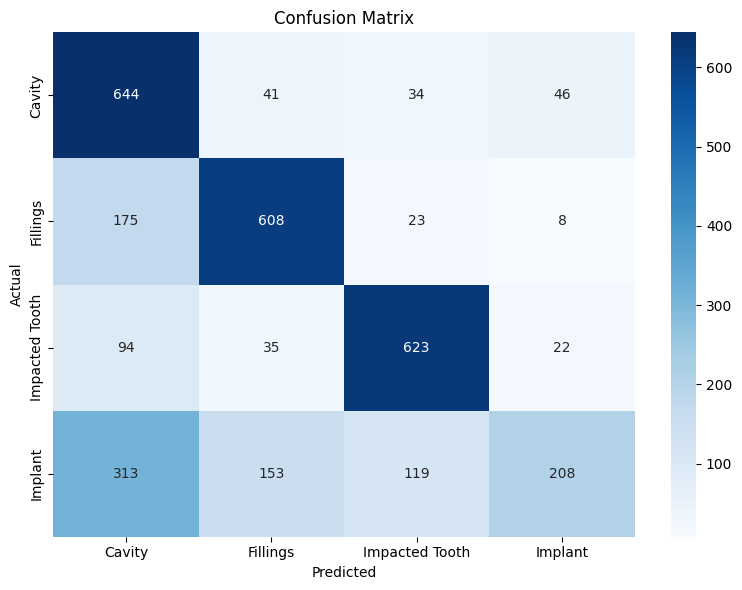

Classification Report:

                precision    recall  f1-score   support

        Cavity       0.53      0.84      0.65       765
      Fillings       0.73      0.75      0.74       814
Impacted Tooth       0.78      0.80      0.79       774
       Implant       0.73      0.26      0.39       793

      accuracy                           0.66      3146
     macro avg       0.69      0.66      0.64      3146
  weighted avg       0.69      0.66      0.64      3146



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v4.h5")

# Test data path
test_dir = "D:/Major Project/normalized/test"

# Image preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report 
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n")
print(report)
